# Time-series Stock Data

##### Notebook setup

In [1]:
import pandas as pd
import pandas.io.data
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
start = datetime.date(2012, 1, 1)
end = datetime.date(2014, 12, 31)
msft = pd.io.data.DataReader('MSFT', "yahoo", start, end)
msft[:5]

             Open   High    Low  Close    Volume  Adj Close
Date                                                       
2012-01-03  26.55  26.96  26.39  26.77  64731500      24.11
2012-01-04  26.82  27.47  26.78  27.40  80516100      24.67
2012-01-05  27.38  27.73  27.29  27.68  56081400      24.92
2012-01-06  27.53  28.19  27.53  28.11  99455500      25.31
2012-01-09  28.05  28.10  27.72  27.74  59706800      24.98

In [3]:
def get(tickers, start, end):
    def data(ticker):
        return pd.io.data.DataReader(ticker, 'yahoo', start, end)
    datas = map(data, tickers)
    return pd.concat(datas, keys=tickers, names=['Ticker','Date'])

In [4]:
tickers = ['AAPL','MSFT','GE','IBM','AA','DAL','UAL', 'PEP', 'KO']
all_data = get(tickers, start, end)
all_data[:5]

                     Open    High     Low   Close    Volume  Adj Close
Ticker Date                                                           
AAPL   2012-01-03  409.40  412.50  409.00  411.23  75555200      54.93
       2012-01-04  410.00  414.68  409.28  413.44  65005500      55.23
       2012-01-05  414.95  418.55  412.67  418.03  67817400      55.84
       2012-01-06  419.77  422.75  419.22  422.40  79573200      56.43
       2012-01-09  425.50  427.75  421.35  421.73  98506100      56.34

In [5]:
sp_500 = pd.io.data.DataReader("^GSPC", "yahoo", start, end)
sp_500[:5]

               Open     High      Low    Close      Volume  Adj Close
Date                                                                 
2012-01-03  1258.86  1284.62  1258.86  1277.06  3943710000    1277.06
2012-01-04  1277.03  1278.73  1268.10  1277.30  3592580000    1277.30
2012-01-05  1277.30  1283.05  1265.26  1281.06  4315950000    1281.06
2012-01-06  1280.93  1281.84  1273.34  1277.81  3656830000    1277.81
2012-01-09  1277.83  1281.99  1274.55  1280.70  3371600000    1280.70

#### Plotting closing prices

In [6]:
# reset the index to make everything columns
just_closing_prices = all_data[['Adj Close']].reset_index()
just_closing_prices[:5]

  Ticker       Date  Adj Close
0   AAPL 2012-01-03      54.93
1   AAPL 2012-01-04      55.23
2   AAPL 2012-01-05      55.84
3   AAPL 2012-01-06      56.43
4   AAPL 2012-01-09      56.34

In [7]:
daily_close_px = just_closing_prices.pivot('Date', 'Ticker',
'Adj Close')

In [8]:
daily_close_px[:5]

Ticker        AA   AAPL   DAL  ...    MSFT    PEP    UAL
Date                           ...                      
2012-01-03  8.85  54.93  7.88  ...   24.11  59.54  18.90
2012-01-04  9.06  55.23  7.85  ...   24.67  59.84  18.52
2012-01-05  8.97  55.84  8.16  ...   24.92  59.38  18.39
2012-01-06  8.78  56.43  8.15  ...   25.31  58.63  18.21
2012-01-09  9.04  56.34  8.11  ...   24.98  58.94  17.93

[5 rows x 9 columns]

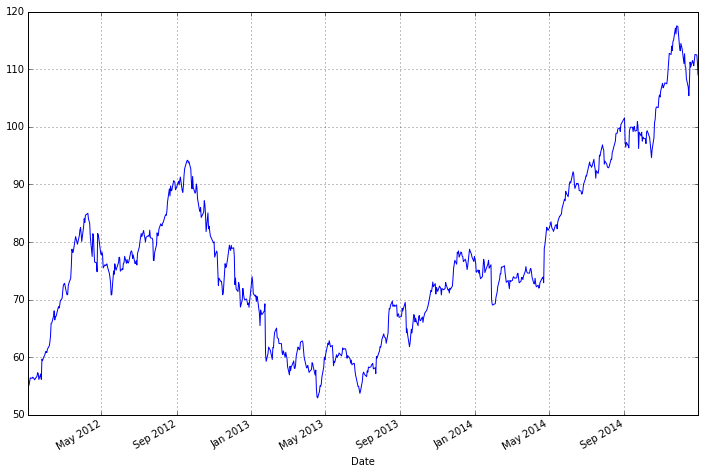

In [9]:
_ = daily_close_px['AAPL'].plot(figsize=(12,8))

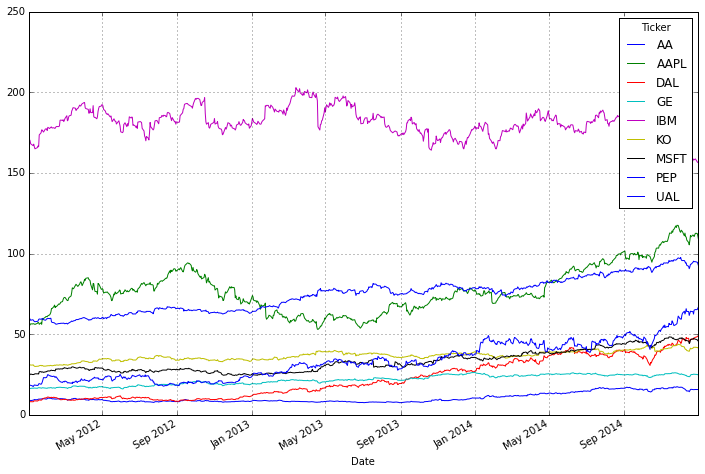

In [10]:
_ = daily_close_px.plot(figsize=(12,8));

#### Plotting volume-series data

In [11]:
msftV = all_data.Volume.loc['MSFT']

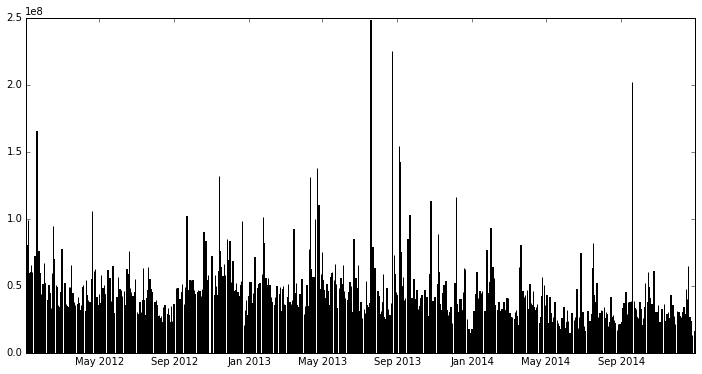

In [12]:
plt.bar(msftV.index, msftV)
plt.gcf().set_size_inches(12,6)

#### Combined price and volumes

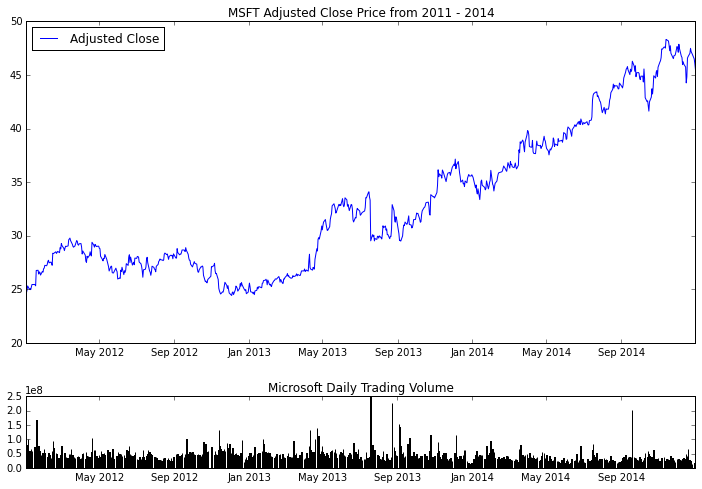

In [13]:
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(daily_close_px.index,daily_close_px['MSFT'],label='Adjusted Close')
plt.title('MSFT Adjusted Close Price from 2011 - 2014')
plt.legend(loc=2)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msftV.index, msftV)
plt.title('Microsoft Daily Trading Volume')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)

#### Plotting candlesticks

In [14]:
subset = all_data.loc['MSFT'].loc['2014-12':'2014-12'] .reset_index()
subset[:5]

        Date   Open   High  ...    Close    Volume  Adj Close
0 2014-12-01  47.88  48.78  ...    48.62  31191600      47.65
1 2014-12-02  48.84  49.05  ...    48.46  25743000      47.49
2 2014-12-03  48.44  48.50  ...    48.08  23534800      47.12
3 2014-12-04  48.39  49.06  ...    48.84  30320400      47.87
4 2014-12-05  48.82  48.97  ...    48.42  27313400      47.45

[5 rows x 7 columns]

In [15]:
import matplotlib.dates as mdates
subset['date_num'] = subset['Date'] .apply(lambda date: mdates.date2num(date.to_pydatetime()))
subset[:5]

        Date   Open   High  ...      Volume  Adj Close  date_num
0 2014-12-01  47.88  48.78  ...    31191600      47.65    735568
1 2014-12-02  48.84  49.05  ...    25743000      47.49    735569
2 2014-12-03  48.44  48.50  ...    23534800      47.12    735570
3 2014-12-04  48.39  49.06  ...    30320400      47.87    735571
4 2014-12-05  48.82  48.97  ...    27313400      47.45    735572

[5 rows x 8 columns]

In [16]:
subset_as_tuples = [tuple(x) for x in subset[['date_num',
'Open',
'High',
'Low',
'Close']].values]
subset_as_tuples

[(735568.0, 47.880001, 48.779998999999997, 47.709998999999996, 48.619999),
 (735569.0, 48.840000000000003, 49.049999, 48.200001, 48.459998999999996),
 (735570.0, 48.439999, 48.5, 47.810001, 48.080002),
 (735571.0, 48.389998999999996, 49.060001, 48.200001, 48.840000000000003),
 (735572.0, 48.82, 48.970001000000003, 48.380001, 48.419998),
 (735575.0, 48.259997999999996, 48.349997999999999, 47.450001, 47.700001),
 (735576.0, 47.110001000000004, 47.919998, 47.049999, 47.590000000000003),
 (735577.0, 47.580002, 47.659999999999997, 46.700001, 46.900002000000001),
 (735578.0, 47.080002, 47.740002000000004, 46.68, 47.169998),
 (735579.0, 46.779998999999997, 47.729999999999997, 46.669998, 46.950001),
 (735582.0, 47.200001, 47.669998, 46.549999, 46.669998),
 (735583.0,
  45.900002000000001,
  46.340000000000003,
  45.130001,
  45.159999999999997),
 (735584.0, 45.049999, 45.950001, 44.900002000000001, 45.740002000000004),
 (735585.0,
  46.580002,
  47.520000000000003,
  46.340000000000003,
  47.5

In [17]:
from matplotlib.dates import DateFormatter
week_formatter = DateFormatter('%b %d') # e.g., Jan 12

In [18]:
from matplotlib.dates import (WeekdayLocator, MONDAY)
mondays = WeekdayLocator(MONDAY) # major ticks on the mondays

([<matplotlib.lines.Line2D at 0xb19d270>,
  <matplotlib.patches.Rectangle at 0xb502130>])

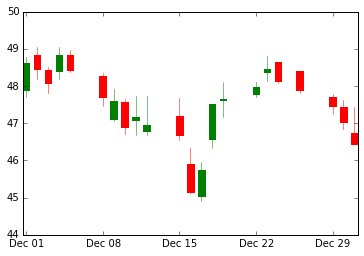

In [19]:
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)
from matplotlib.finance import candlestick_ohlc
candlestick_ohlc(ax, subset_as_tuples, width=0.6,
colorup='g',colordown='r')

#### Calculating simple daily percentage change

In [20]:
dpc_1 = daily_close_px.iloc[1:] / daily_close_px.iloc[:-1].values - 1
dpc_1.ix[:,'AA':'AAPL'][:5]

Ticker        AA  AAPL
Date                  
2012-01-04  0.02  0.01
2012-01-05 -0.01  0.01
2012-01-06 -0.02  0.01
2012-01-09  0.03 -0.00
2012-01-10  0.00  0.00

In [21]:
price_matrix_minus_day1 = daily_close_px.iloc[1:]
price_matrix_minus_day1[:5]

Ticker        AA   AAPL   DAL  ...    MSFT    PEP    UAL
Date                           ...                      
2012-01-04  9.06  55.23  7.85  ...   24.67  59.84  18.52
2012-01-05  8.97  55.84  8.16  ...   24.92  59.38  18.39
2012-01-06  8.78  56.43  8.15  ...   25.31  58.63  18.21
2012-01-09  9.04  56.34  8.11  ...   24.98  58.94  17.93
2012-01-10  9.05  56.54  8.10  ...   25.07  58.88  17.48

[5 rows x 9 columns]

In [22]:
daily_close_px.iloc[:-1].values

array([[   8.846023,   54.934465,    7.878849, ...,   24.105181,
          59.539945,   18.9     ],
       [   9.056871,   55.229691,    7.849451, ...,   24.672467,
          59.844815,   18.52    ],
       [   8.970615,   55.842847,    8.163037, ...,   24.924595,
          59.378541,   18.389999],
       ..., 
       [  15.708264,  112.560096,   48.053324, ...,   46.925247,
          94.961774,   65.279999],
       [  15.708264,  112.481106,   48.44061 , ...,   46.503821,
          94.64866 ,   65.220001],
       [  15.738053,  111.108535,   48.88748 , ...,   46.082396,
          93.895224,   66.050003]])

In [23]:
dpc_2 = daily_close_px / daily_close_px.shift(1) - 1
dpc_2.ix[:,0:2][:5]

Ticker        AA  AAPL
Date                  
2012-01-03   NaN   NaN
2012-01-04  0.02  0.01
2012-01-05 -0.01  0.01
2012-01-06 -0.02  0.01
2012-01-09  0.03 -0.00

In [24]:
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.ix[:,0:2][:5]

Ticker        AA  AAPL
Date                  
2012-01-03   NaN   NaN
2012-01-04  0.02  0.01
2012-01-05 -0.01  0.01
2012-01-06 -0.02  0.01
2012-01-09  0.03 -0.00

In [25]:
daily_pct_change.fillna(0, inplace=True)
daily_pct_change.ix[:5,:5]

Ticker        AA  AAPL   DAL        GE   IBM
Date                                        
2012-01-03  0.00  0.00  0.00  0.00e+00  0.00
2012-01-04  0.02  0.01 -0.00  1.09e-02 -0.00
2012-01-05 -0.01  0.01  0.04 -5.39e-04 -0.00
2012-01-06 -0.02  0.01 -0.00  5.39e-03 -0.01
2012-01-09  0.03 -0.00 -0.00  1.13e-02 -0.01

#### Calculating simple daily cumulative returns

In [26]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.ix[:,:2][:5]

Ticker        AA  AAPL
Date                  
2012-01-03  1.00  1.00
2012-01-04  1.02  1.01
2012-01-05  1.01  1.02
2012-01-06  0.99  1.03
2012-01-09  1.02  1.03

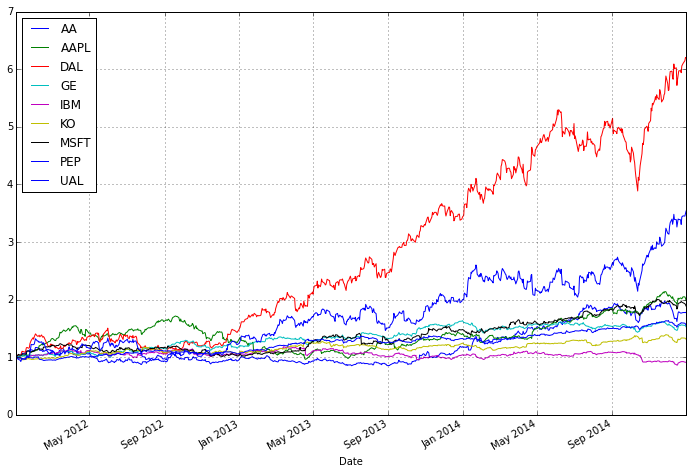

In [27]:
cum_daily_return.plot(figsize=(12,8))
plt.legend(loc=2);

## Analyzing the distribution of returns

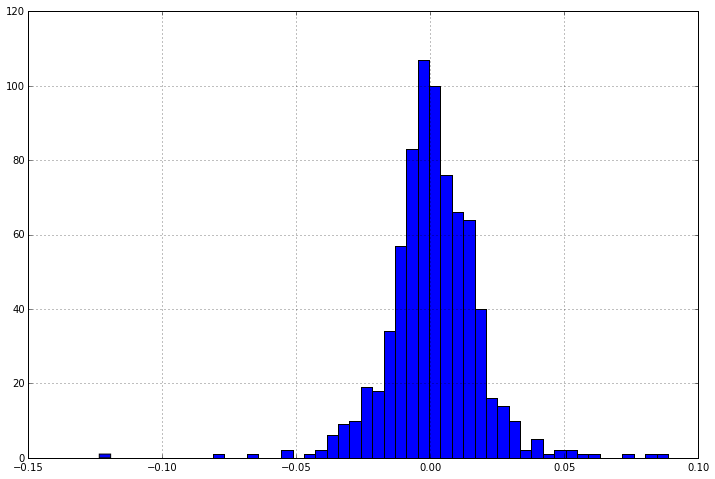

In [28]:
aapl = daily_pct_change['AAPL']
aapl.hist(bins=50, figsize=(12,8));

In [29]:
aapl.describe()

count    7.54e+02
mean     1.05e-03
std      1.68e-02
min     -1.24e-01
25%     -7.37e-03
50%      4.99e-04
75%      1.10e-02
max      8.87e-02
dtype: float64

In [30]:
aapl.describe(percentiles=[0.025, 0.5, 0.975])

count    7.54e+02
mean     1.05e-03
std      1.68e-02
min     -1.24e-01
2.5%    -3.19e-02
50%      4.99e-04
97.5%    3.17e-02
max      8.87e-02
dtype: float64

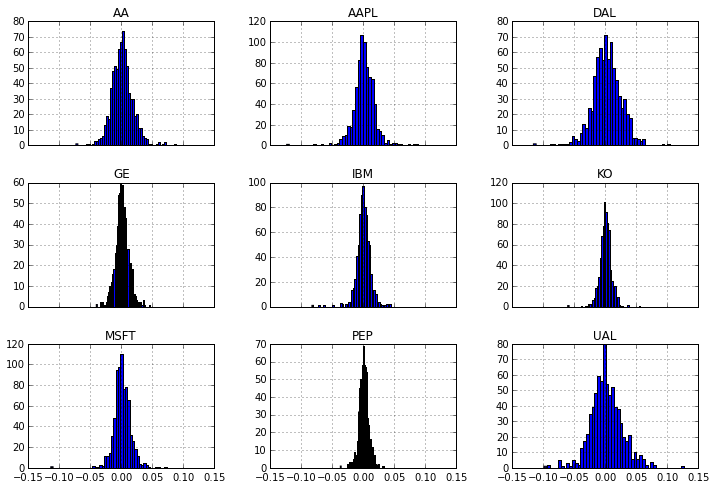

In [31]:
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8));

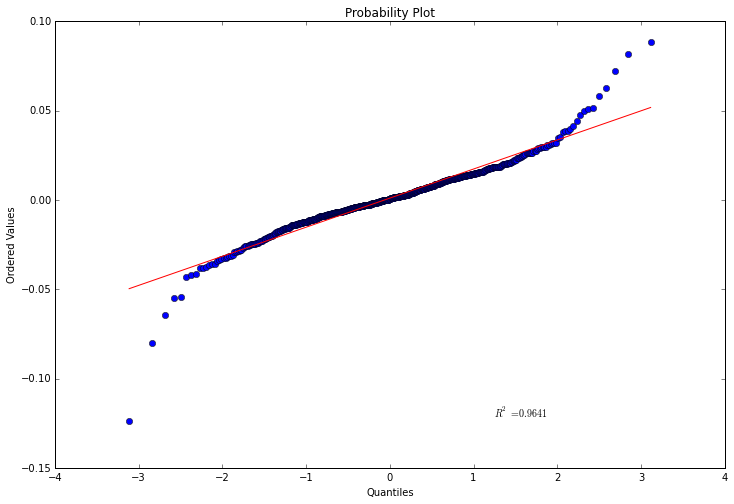

In [32]:
import scipy.stats as stats
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(aapl, dist='norm', plot=ax)
plt.show();

##### http://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot

In [33]:
daily_pct_change[['AAPL']].plot(kind='box', figsize=(3,6))

ValueError: Invalid chart type given box

In [ ]:
daily_pct_change.plot(kind='box', figsize=(12,8))

##### http://pandas.pydata.org/pandas-docs/stable/visualization.html

## Comparison of daily percentage change between stocks

In [ ]:
def render_scatter_plot(data, x_stock_name,
    y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    ax.plot((-10, 10), (-10, 10))
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

In [ ]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'MSFT', 'AAPL', xlim=limits)


In [ ]:
render_scatter_plot(daily_pct_change, 'DAL', 'UAL', xlim=limits)


In [ ]:
# all stocks against each other, with a KDE in the diagonal
_ = pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12));

### Moving windows

In [34]:
msftAC = msft['2012']['Adj Close']
msftAC[:5]

Date
2012-01-03    24.11
2012-01-04    24.67
2012-01-05    24.92
2012-01-06    25.31
2012-01-09    24.98
Name: Adj Close, dtype: float64

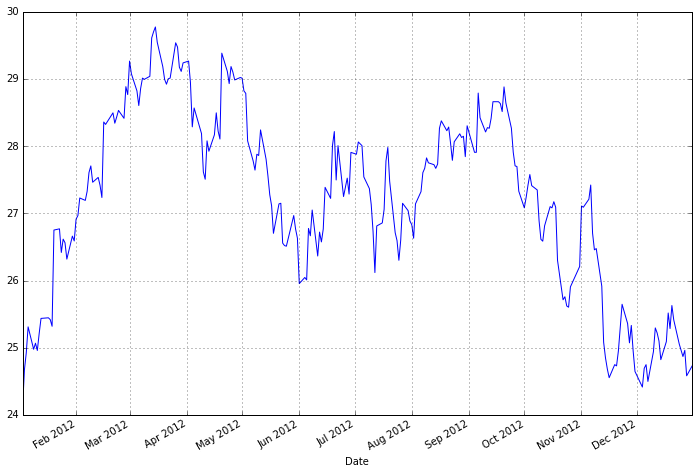

In [35]:
sample = msftAC['2012']
sample.plot(figsize=(12,8));

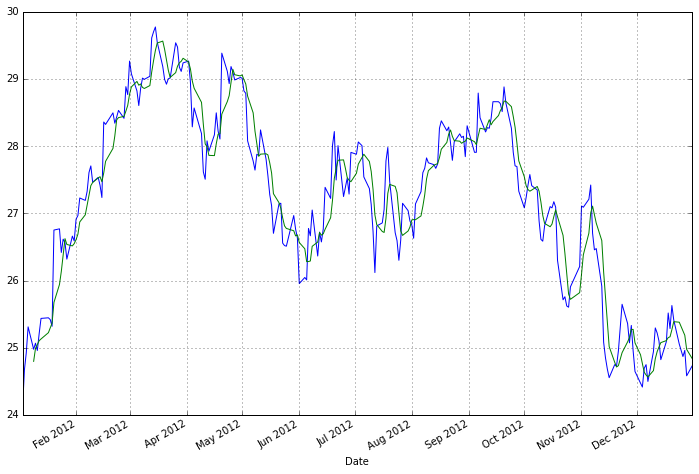

In [36]:
sample.plot(figsize=(12,8))
pd.rolling_mean(sample, 5).plot(figsize=(12,8));

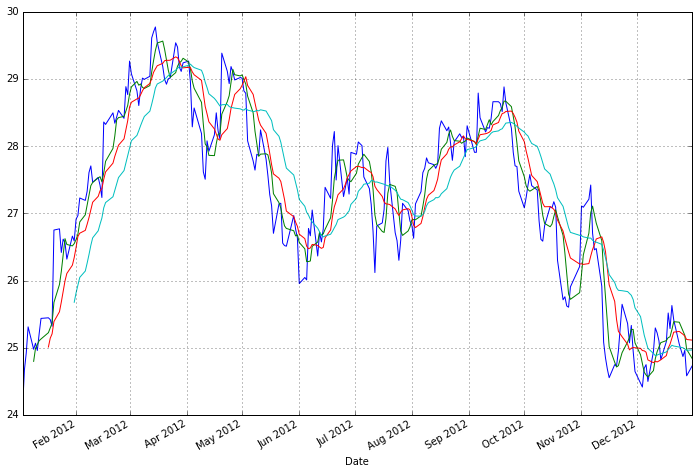

In [37]:
sample.plot(figsize=(12,8))
pd.rolling_mean(sample, 5).plot(figsize=(12,8))
pd.rolling_mean(sample, 10).plot(figsize=(12,8))
pd.rolling_mean(sample, 20).plot(figsize=(12,8));

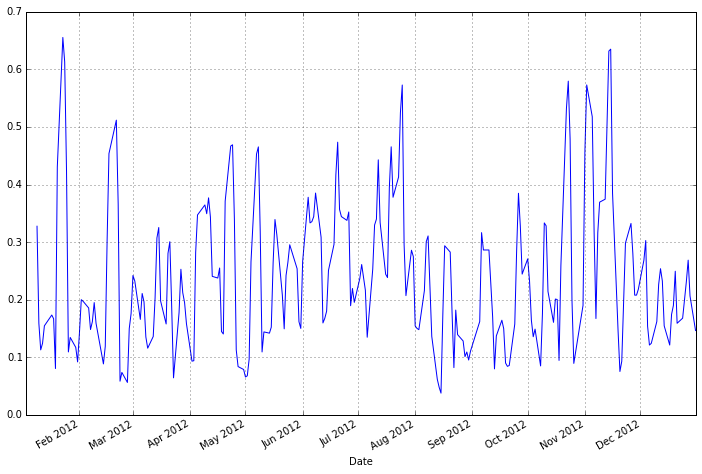

In [38]:
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
pd.rolling_apply(sample, 5, mean_abs_dev).plot(figsize=(12,8));

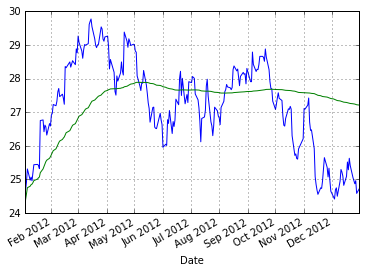

In [39]:
expanding_mean = lambda x: pd.rolling_mean(x, len(x),
min_periods=1)
sample.plot()
pd.expanding_mean(sample).plot();

## Volatility calculation

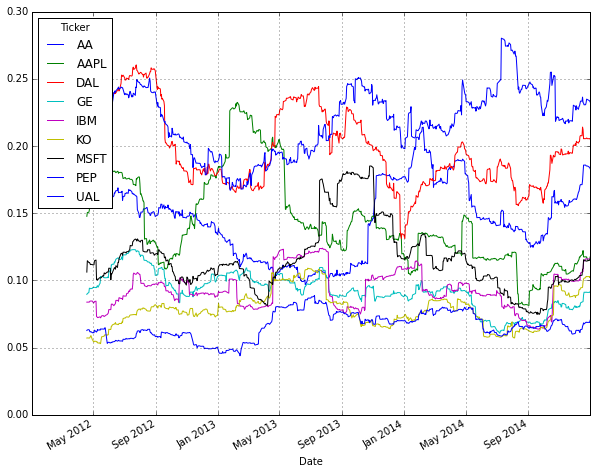

In [40]:
min_periods = 75
vol = pd.rolling_std(daily_pct_change, min_periods) * np.sqrt(min_periods)
vol.plot(figsize=(10, 8));

## Rolling correlation of returns

In [41]:
rolling_corr = pd.rolling_corr(daily_pct_change['AAPL'],
daily_pct_change['MSFT'],
window=252).dropna()
rolling_corr[251:] #first 251 are NaN

Date
2014-01-02    0.08
2014-01-03    0.08
2014-01-06    0.07
...
2014-12-29    0.23
2014-12-30    0.23
2014-12-31    0.24
Length: 252

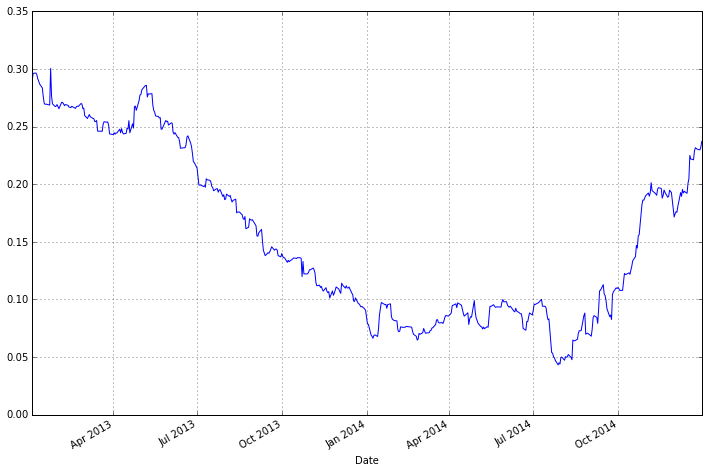

In [42]:
rolling_corr.plot(figsize=(12,8))

## Least-squares regression of returns

In [43]:
model = pd.ols(y=daily_pct_change['AAPL'],
x={'MSFT': daily_pct_change['MSFT']},window=250)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <MSFT> + <intercept>

Number of Observations:         250
Number of Degrees of Freedom:   2

R-squared:         0.0539
Adj R-squared:     0.0501

Rmse:              0.0132

F-stat (1, 248):    14.1193, p-value:     0.0002

Degrees of Freedom: model 1, resid 248

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
          MSFT     0.2625     0.0699       3.76     0.0002     0.1256     0.3994
     intercept     0.0013     0.0008       1.56     0.1195    -0.0003     0.0030
---------------------------------End of Summary---------------------------------

In [44]:
model.beta[0:5] # what is the beta?

            MSFT  intercept
Date                       
2012-12-31  0.40          0
2013-01-02  0.41          0
2013-01-03  0.41          0
2013-01-04  0.42          0
2013-01-07  0.42          0

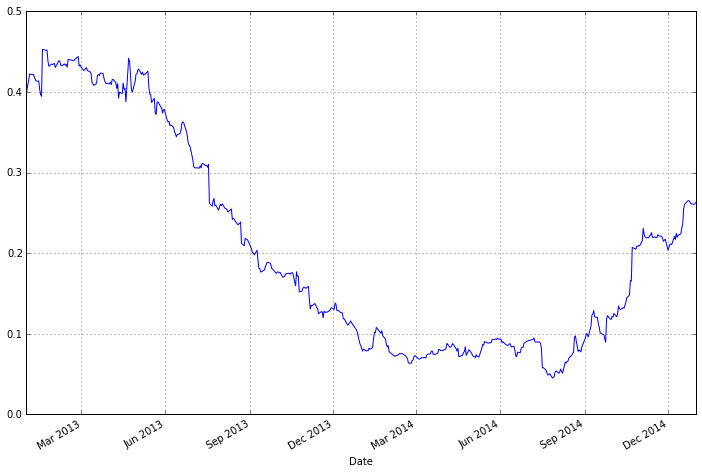

In [45]:
_ = model.beta['MSFT'].plot(figsize=(12, 8)); # plot the beta

# Comparing stocks to the S&P 500

In [46]:
sp_500_dpc = sp_500['Adj Close'].pct_change().fillna(0)
sp_500_dpc[:5]

Date
2012-01-03    0.00e+00
2012-01-04    1.88e-04
2012-01-05    2.94e-03
2012-01-06   -2.54e-03
2012-01-09    2.26e-03
Name: Adj Close, dtype: float64

In [47]:
sp_500_dpc = sp_500['Adj Close'].pct_change().fillna(0)
sp_500_dpc[:5]

Date
2012-01-03    0.00e+00
2012-01-04    1.88e-04
2012-01-05    2.94e-03
2012-01-06   -2.54e-03
2012-01-09    2.26e-03
Name: Adj Close, dtype: float64

In [48]:
dpc_all = pd.concat([sp_500_dpc, daily_pct_change], axis=1)
dpc_all.rename(columns={'Adj Close': 'SP500'}, inplace=True)
dpc_all[:5]

               SP500    AA  AAPL  ...   MSFT   PEP   UAL
Date                              ...                   
2012-01-03  0.00e+00  0.00  0.00  ...   0.00  0.00  0.00
2012-01-04  1.88e-04  0.02  0.01  ...   0.02  0.01 -0.02
2012-01-05  2.94e-03 -0.01  0.01  ...   0.01 -0.01 -0.01
2012-01-06 -2.54e-03 -0.02  0.01  ...   0.02 -0.01 -0.01
2012-01-09  2.26e-03  0.03 -0.00  ...  -0.01  0.01 -0.02

[5 rows x 10 columns]

In [49]:
cdr_all = (1 + dpc_all).cumprod()
cdr_all[:5]

            SP500    AA  AAPL  ...   MSFT   PEP   UAL
Date                           ...                   
2012-01-03      1  1.00  1.00  ...   1.00  1.00  1.00
2012-01-04      1  1.02  1.01  ...   1.02  1.01  0.98
2012-01-05      1  1.01  1.02  ...   1.03  1.00  0.97
2012-01-06      1  0.99  1.03  ...   1.05  0.98  0.96
2012-01-09      1  1.02  1.03  ...   1.04  0.99  0.95

[5 rows x 10 columns]

In [50]:
dpc_corrs = dpc_all.corr()
dpc_corrs

       SP500    AA  AAPL  ...   MSFT   PEP   UAL
SP500   1.00  0.60  0.41  ...   0.54  0.52  0.32
AA      0.60  1.00  0.24  ...   0.31  0.23  0.22
AAPL    0.41  0.24  1.00  ...   0.19  0.09  0.06
DAL     0.42  0.25  0.14  ...   0.15  0.17  0.76
GE      0.73  0.46  0.24  ...   0.34  0.38  0.24
IBM     0.53  0.31  0.21  ...   0.36  0.26  0.12
KO      0.53  0.23  0.16  ...   0.27  0.56  0.14
MSFT    0.54  0.31  0.19  ...   1.00  0.28  0.13
PEP     0.52  0.23  0.09  ...   0.28  1.00  0.13
UAL     0.32  0.22  0.06  ...   0.13  0.13  1.00

[10 rows x 10 columns]

In [51]:
dpc_corrs.ix['SP500']

SP500    1.00
AA       0.60
AAPL     0.41
DAL      0.42
GE       0.73
IBM      0.53
KO       0.53
MSFT     0.54
PEP      0.52
UAL      0.32
Name: SP500, dtype: float64

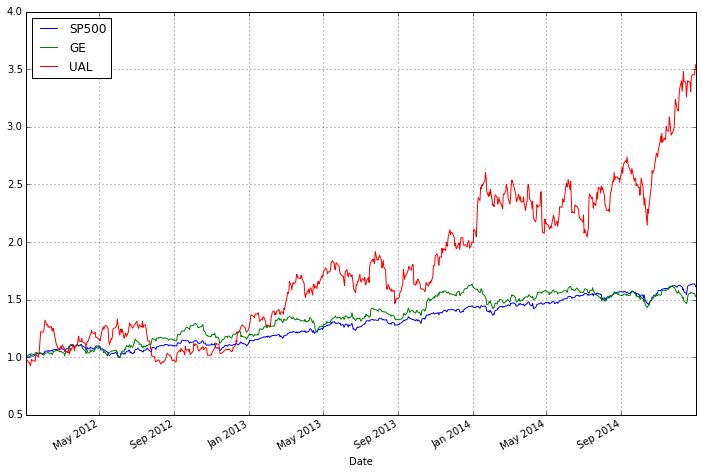

In [52]:
_ = cdr_all[['SP500', 'GE', 'UAL']].plot(figsize=(12,8));

In [53]:
render_scatter_plot(dpc_all, 'GE', 'SP500')
plt.savefig('5104_05_23.png', bbox_inches='tight', dpi=300)

NameError: name 'render_scatter_plot' is not defined

In [54]:
render_scatter_plot(dpc_all, 'UAL', 'SP500')

NameError: name 'render_scatter_plot' is not defined

Chapter6 Trading Using Google Trends

##### http://www.nature.com/articles/srep01684

In [55]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas.io.data as web

In [56]:
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 6)

In [57]:
%matplotlib inline

### Data collection

In [58]:
paper = pd.read_csv('PreisMoatStanley2013.dat',delimiter=' ',parse_dates=[0,1,100,101])
paper[:5]

  Google Start Date Google End Date     arts  banking   ...       water  \
0        2004-01-04      2004-01-10  0.95667  0.19333   ...     1.91333   
1        2004-01-11      2004-01-17  0.97000  0.20333   ...     1.93333   
2        2004-01-18      2004-01-24  0.92667  0.19667   ...     1.89333   
3        2004-01-25      2004-01-31  0.95000  0.19667   ...     1.92000   
4        2004-02-01      2004-02-07  0.89333  0.20333   ...     1.88667   

     world  DJIA Date  DJIA Closing Price  
0  4.83333 2004-01-12            10485.18  
1  4.76667 2004-01-20            10528.66  
2  4.60000 2004-01-26            10702.51  
3  4.53333 2004-02-02            10499.18  
4  4.53333 2004-02-09            10579.03  

[5 rows x 102 columns]

In [59]:
data = pd.DataFrame({'GoogleWE': paper['Google End Date'],'debt': paper['debt'].astype(np.float64),
'DJIADate': paper['DJIA Date'],'DJIAClose': paper['DJIA Closing Price'].astype(np.float64)})

In [60]:
data[:5]

   DJIAClose   DJIADate   GoogleWE     debt
0   10485.18 2004-01-12 2004-01-10  0.21000
1   10528.66 2004-01-20 2004-01-17  0.21000
2   10702.51 2004-01-26 2004-01-24  0.21000
3   10499.18 2004-02-02 2004-01-31  0.21333
4   10579.03 2004-02-09 2004-02-07  0.20000

#### Gathering our own DJIA data from Quandl

In [61]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas.io.data as web
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 6)
%matplotlib inline


In [62]:
paper = pd.read_csv('PreisMoatStanley2013.dat',delimiter=' ',parse_dates=[0,1,100,101])
paper[:5]

  Google Start Date Google End Date     arts  banking   ...       water  \
0        2004-01-04      2004-01-10  0.95667  0.19333   ...     1.91333   
1        2004-01-11      2004-01-17  0.97000  0.20333   ...     1.93333   
2        2004-01-18      2004-01-24  0.92667  0.19667   ...     1.89333   
3        2004-01-25      2004-01-31  0.95000  0.19667   ...     1.92000   
4        2004-02-01      2004-02-07  0.89333  0.20333   ...     1.88667   

     world  DJIA Date  DJIA Closing Price  
0  4.83333 2004-01-12            10485.18  
1  4.76667 2004-01-20            10528.66  
2  4.60000 2004-01-26            10702.51  
3  4.53333 2004-02-02            10499.18  
4  4.53333 2004-02-09            10579.03  

[5 rows x 102 columns]

In [63]:
data = pd.DataFrame({'GoogleWE': paper['Google End Date'],'debt': paper['debt'].astype(np.float64),
'DJIADate': paper['DJIA Date'],'DJIAClose': paper['DJIA Closing Price'].astype(np.float64)})

data[:5]

   DJIAClose   DJIADate   GoogleWE     debt
0   10485.18 2004-01-12 2004-01-10  0.21000
1   10528.66 2004-01-20 2004-01-17  0.21000
2   10702.51 2004-01-26 2004-01-24  0.21000
3   10499.18 2004-02-02 2004-01-31  0.21333
4   10579.03 2004-02-09 2004-02-07  0.20000

In [64]:
import Quandl

In [65]:
djia = Quandl.get("YAHOO/INDEX_DJI",trim_start='2004-01-01',trim_end='2011-03-05')

In [66]:
djia[:5]

               Open     High      Low    Close   Volume  Adjusted Close
Date                                                                   
2004-01-02  10452.7  10527.0  10384.3  10409.9  1688900         10409.9
2004-01-05  10411.9  10544.1  10411.9  10544.1  2212900         10544.1
2004-01-06  10543.9  10549.2  10499.9  10538.7  1914600         10538.7
2004-01-07  10535.5  10539.5  10466.3  10529.0  2254900         10529.0
2004-01-08  10530.1  10592.6  10530.1  10592.4  2377700         10592.4

In [67]:
djia_closes = djia['Close'].reset_index()
djia_closes[:3]

        Date    Close
0 2004-01-02  10409.9
1 2004-01-05  10544.1
2 2004-01-06  10538.7

In [68]:
djia['Close']

Date
2004-01-02    10409.9
2004-01-05    10544.1
2004-01-06    10538.7
...
2011-03-02    12066.8
2011-03-03    12258.2
2011-03-04    12169.9
Name: Close, Length: 1806

In [69]:
#we will create a new DataFrame object with the two datasets merged

In [70]:
data = pd.merge(data, djia_closes,left_on='DJIADate', right_on='Date')
data.drop(['DJIADate'], inplace=True, axis=1)
data = data.set_index('Date')
data[:3]

            DJIAClose   GoogleWE  debt    Close
Date                                           
2004-01-12   10485.18 2004-01-10  0.21  10485.2
2004-01-20   10528.66 2004-01-17  0.21  10528.7
2004-01-26   10702.51 2004-01-24  0.21  10702.5

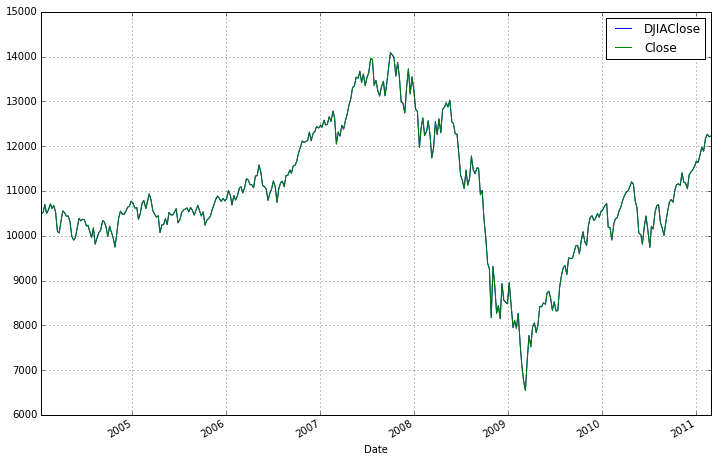

In [74]:
data[['DJIAClose', 'Close']].plot(figsize=(12,8))

In [75]:
(data['DJIAClose']-data['Close']).describe()

count    373.00000
mean      -0.00493
std        0.03003
min       -0.05000
25%       -0.03000
50%       -0.01000
75%        0.02000
max        0.04000
dtype: float64

In [76]:
data[['DJIAClose', 'Close']].corr()

           DJIAClose  Close
DJIAClose          1      1
Close              1      1

# Google Trends data

get the associated trend data at 'debt'
http://www.google.com/trends/

https://www.google.com/trends/explore#q=debt

In [77]:
from StringIO import StringIO

In [78]:
with open("trends_report_debt.csv") as f:
    data_section = f.read().split('\n\n')[1]
    trends_data = pd.read_csv( StringIO(data_section),header=1, index_col='Week', 
            converters={'Week': lambda x: pd.to_datetime(x.split(' ')[-1])
               }
    )

In [79]:
our_debt_trends = trends_data['2004-01-01':'2011-02-28'] .reset_index()


In [80]:
our_debt_trends[:5]

        Week  debt
0 2004-01-10    63
1 2004-01-17    60
2 2004-01-24    61
3 2004-01-31    63
4 2004-02-07    61

In [81]:
final = pd.merge(data.reset_index(), our_debt_trends,left_on='GoogleWE', right_on='Week',
suffixes=['_P', '_O'])

final.drop('Week', inplace=True, axis=1)
final.set_index('Date', inplace=True)
final[:5]

            DJIAClose   GoogleWE   debt_P    Close  debt_O
Date                                                      
2004-01-12   10485.18 2004-01-10  0.21000  10485.2      63
2004-01-20   10528.66 2004-01-17  0.21000  10528.7      60
2004-01-26   10702.51 2004-01-24  0.21000  10702.5      61
2004-02-02   10499.18 2004-01-31  0.21333  10499.2      63
2004-02-09   10579.03 2004-02-07  0.20000  10579.0      61

In [85]:
combined_trends = final[['GoogleWE', 'debt_P', 'debt_O']] .set_index('GoogleWE')
combined_trends[:5]

             debt_P  debt_O
GoogleWE                   
2004-01-10  0.21000      63
2004-01-17  0.21000      60
2004-01-24  0.21000      61
2004-01-31  0.21333      63
2004-02-07  0.20000      61

In [86]:
combined_trends.corr()

         debt_P   debt_O
debt_P  1.00000  0.95766
debt_O  0.95766  1.00000

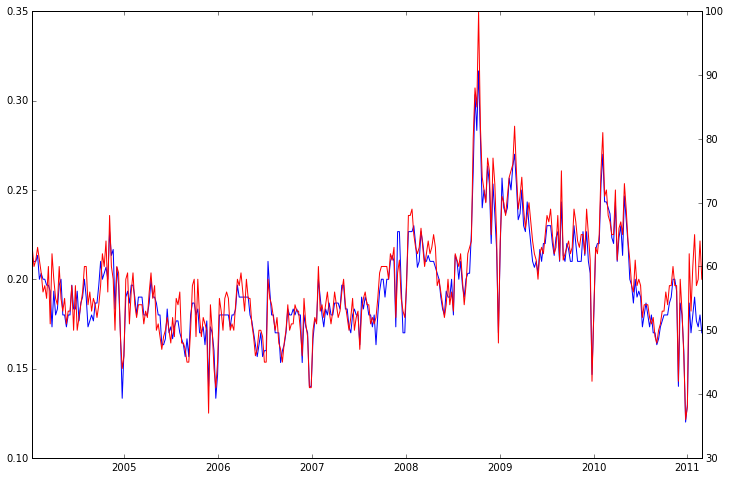

In [89]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(combined_trends.index,
combined_trends.debt_P, color='b')
ax2 = ax1.twinx()
ax2.plot(combined_trends.index,
combined_trends.debt_O, color='r')
plt.show()

Generating order signals

In [90]:
base = final.reset_index().set_index('GoogleWE')
base.drop(['DJIAClose'], inplace=True, axis=1)
base[:3]

                 Date  debt_P    Close  debt_O
GoogleWE                                      
2004-01-10 2004-01-12    0.21  10485.2      63
2004-01-17 2004-01-20    0.21  10528.7      60
2004-01-24 2004-01-26    0.21  10702.5      61

In [93]:
base['PMA'] = pd.rolling_mean(base.debt_P.shift(1), 3)
base['OMA'] = pd.rolling_mean(base.debt_O.shift(1), 3)
base[:5]

                 Date   debt_P    Close  debt_O  signal0      PMA       OMA
GoogleWE                                                                   
2004-01-10 2004-01-12  0.21000  10485.2      63        0      NaN       NaN
2004-01-17 2004-01-20  0.21000  10528.7      60        0      NaN       NaN
2004-01-24 2004-01-26  0.21000  10702.5      61        0      NaN       NaN
2004-01-31 2004-02-02  0.21333  10499.2      63        0  0.21000  61.33333
2004-02-07 2004-02-09  0.20000  10579.0      61        0  0.21111  61.33333

In [94]:
base['signal0'] = 0 # default to 0
base.loc[base.debt_P > base.PMA, 'signal0'] = -1
base.loc[base.debt_P < base.PMA, 'signal0'] = 1
base['signal1'] = 0

In [97]:
base.loc[base.debt_O > base.OMA, 'signal1'] = -1
base.loc[base.debt_O < base.OMA, 'signal1'] = 1
base[['debt_P', 'PMA', 'signal0', 'debt_O', 'OMA', 'signal1']]

             debt_P      PMA  signal0  debt_O       OMA  signal1
GoogleWE                                                        
2004-01-10  0.21000      NaN        0      63       NaN        0
2004-01-17  0.21000      NaN        0      60       NaN        0
2004-01-24  0.21000      NaN        0      61       NaN        0
2004-01-31  0.21333  0.21000       -1      63  61.33333       -1
2004-02-07  0.20000  0.21111        1      61  61.33333        1
...             ...      ...      ...     ...       ...      ...
2011-01-29  0.19000  0.17889       -1      65  58.33333       -1
2011-02-05  0.17667  0.18000        1      57  59.33333        1
2011-02-12  0.17333  0.18222        1      58  60.66667        1
2011-02-19  0.18000  0.18000        1      64  60.00000       -1
2011-02-26  0.17000  0.17667        1      58  59.66667        1

[373 rows x 6 columns]

In [98]:
base['PctChg'] = base.Close.pct_change().shift(-1)
base[['Close', 'PctChg', 'signal0', 'signal1']][:5]

              Close   PctChg  signal0  signal1
GoogleWE                                      
2004-01-10  10485.2  0.00415        0        0
2004-01-17  10528.7  0.01651        0        0
2004-01-24  10702.5 -0.01900        0        0
2004-01-31  10499.2  0.00760       -1       -1
2004-02-07  10579.0  0.01285        1        1

In [99]:
base['ret0'] = base.PctChg * base.signal0
base['ret1'] = base.PctChg * base.signal1
base[['Close', 'PctChg', 'signal0', 'signal1','ret0', 'ret1']][:5]

              Close   PctChg  signal0  signal1     ret0     ret1
GoogleWE                                                        
2004-01-10  10485.2  0.00415        0        0  0.00000  0.00000
2004-01-17  10528.7  0.01651        0        0  0.00000  0.00000
2004-01-24  10702.5 -0.01900        0        0 -0.00000 -0.00000
2004-01-31  10499.2  0.00760       -1       -1 -0.00760 -0.00760
2004-02-07  10579.0  0.01285        1        1  0.01285  0.01285

# Cumulative returns and the result of the strategy

In [100]:
base['cumret0'] = (1 + base.ret0).cumprod() - 1
base['cumret1'] = (1 + base.ret1).cumprod() - 1
base[['cumret0', 'cumret1']]

            cumret0  cumret1
GoogleWE                    
2004-01-10  0.00000  0.00000
2004-01-17  0.00000  0.00000
2004-01-24  0.00000  0.00000
2004-01-31 -0.00760 -0.00760
2004-02-07  0.00515  0.00515
...             ...      ...
2011-01-29  2.70149  0.84652
2011-02-05  2.73394  0.86271
2011-02-12  2.71707  0.85430
2011-02-19  2.72118  0.85225
2011-02-26      NaN      NaN

[373 rows x 2 columns]

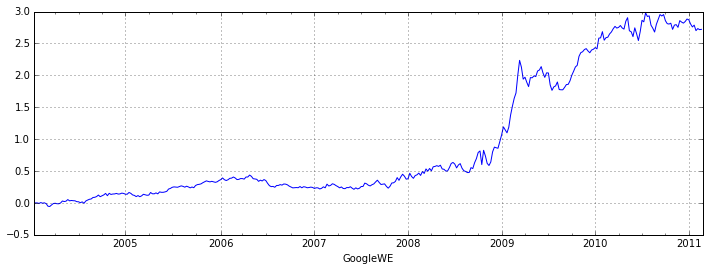

In [101]:
base['cumret0'].plot(figsize=(12,4))

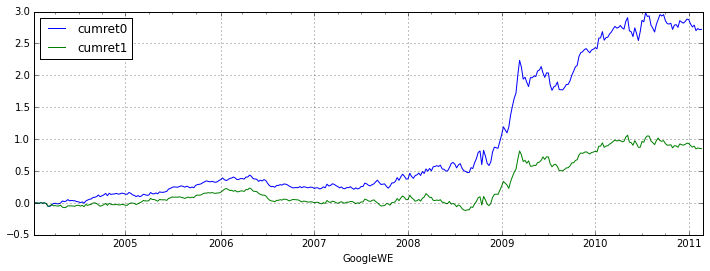

In [103]:
base[['cumret0', 'cumret1']].plot(figsize=(12,4));

Chap7 Algorithmic Trading

# Zipline to develop automated trading algorithms.
http://www.zipline.io

(https://www.quantopian.com/

In [104]:
import pandas as pd
import pandas.io.data as web
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 6)

In [106]:
msft = web.DataReader("MSFT", "yahoo",datetime(2000, 1, 1),datetime(2014, 12, 31))
msft[:5]


                Open     High       Low     Close    Volume  Adj Close
Date                                                                  
2000-01-03  117.3750  118.625  112.0000  116.5625  53228400   40.93304
2000-01-04  113.5625  117.125  112.2500  112.6250  54119000   39.55032
2000-01-05  111.1250  116.375  109.3750  113.8125  64059600   39.96733
2000-01-06  112.1875  113.875  108.3750  110.0000  54976600   38.62850
2000-01-07  108.6250  112.250  107.3125  111.4375  62013600   39.13331

In [107]:
msft['MA7'] = pd.rolling_mean(msft['Adj Close'], 7)
msft['MA30'] = pd.rolling_mean(msft['Adj Close'], 30)
msft['MA90'] = pd.rolling_mean(msft['Adj Close'], 90)
msft['MA120'] = pd.rolling_mean(msft['Adj Close'], 120)

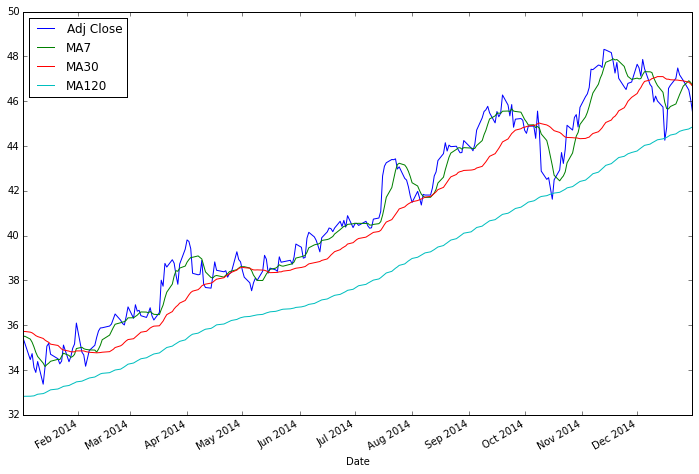

In [165]:
msft['2014'][['Adj Close', 'MA7','MA30', 'MA120']].plot(figsize=(12,8))

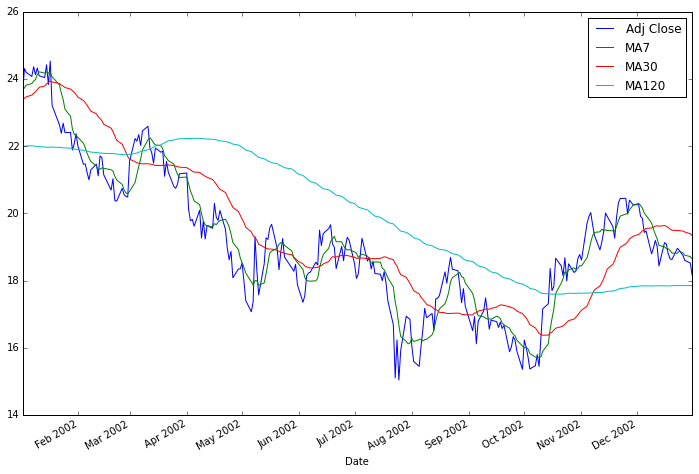

In [167]:
msft['2002'][['Adj Close', 'MA7','MA30', 'MA120']].plot(figsize=(12,8));

In [168]:
periods = 10
alpha = 2.0/(periods +1)
factors = (1-alpha) ** np.arange(1, 11)
sum_factors = factors.sum()
weights = factors/sum_factors
weights

array([ 0.21005616,  0.17186413,  0.14061611,  0.11504954,  0.09413145,
        0.07701664,  0.06301361,  0.05155659,  0.04218267,  0.03451309])

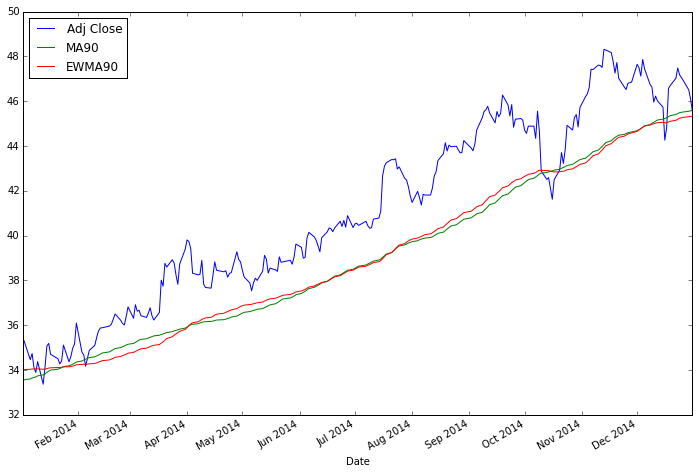

In [169]:
span = 90
msft_ewma = msft[['Adj Close']].copy()
msft_ewma['MA90'] = pd.rolling_mean(msft_ewma, span)
msft_ewma['EWMA90'] = pd.ewma(msft_ewma['Adj Close'],span=span)
msft_ewma['2014'].plot(figsize=(12, 8))

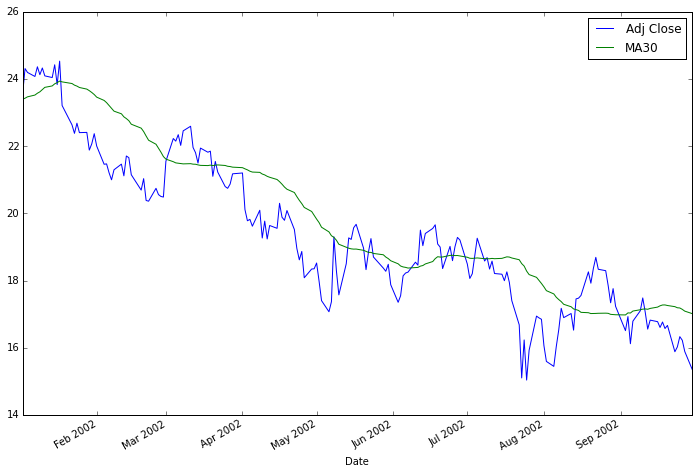

In [170]:
msft['2002-1':'2002-9'][['Adj Close','MA30']].plot(figsize=(12,8))

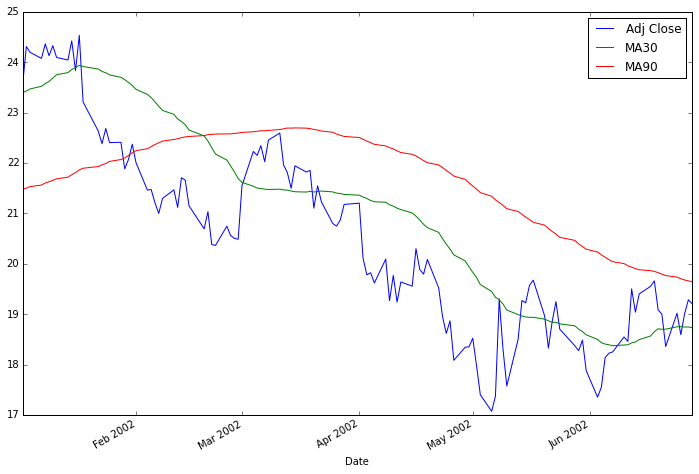

In [171]:
msft['2002-1':'2002-6'][['Adj Close', 'MA30', 'MA90']].plot(figsize=(12,8));

Algo trading with Zipline

In [108]:
import zipline as zp

In [109]:
class BuyApple(zp.TradingAlgorithm):
    trace=False
    def __init__(self, trace=False):
        BuyApple.trace = trace
        super(BuyApple, self).__init__()
    def initialize(context):
        if BuyApple.trace: print("---> initialize")
        if BuyApple.trace: print(context)
        if BuyApple.trace: print("<--- initialize")
    def handle_data(self, context):
        if BuyApple.trace: print("---> handle_data")
        if BuyApple.trace: print(context)
        self.order("AAPL", 1)
        if BuyApple.trace: print("<-- handle_data")

In [110]:
import zipline.utils.factory as zpf
import datetime as datetime

In [111]:
data = zpf.load_from_yahoo(stocks=['AAPL'],indexes={},start=datetime(1990, 1, 1),end=datetime(2014, 1, 1),adjusted=False)
data.plot(figsize=(12,8))

TypeError: 'module' object is not callable

Working with Options

In [112]:
import pandas as pd
import numpy as np
import pandas.io.data as web
from datetime import datetime
import matplotlib.pyplot as plt
#%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 15)
pd.set_option('display.width', 82)
pd.set_option('precision', 3)


In [113]:
aapl_options = web.Options('AAPL', 'yahoo')
aapl_options = aapl_options.get_all_data().reset_index()

AttributeError: 'str' object has no attribute 'month'

In [114]:
aapl_options.to_csv('aapl_options.csv')

AttributeError: 'Options' object has no attribute 'to_csv'

In [115]:
aapl_options = pd.read_csv('aapl_options.csv',parse_dates=['Expiry'])

IOError: File aapl_options.csv does not exist

In [116]:
def get_historical_closes(ticker, start_date, end_date):
    p = web.DataReader(ticker, "yahoo", start_date, end_date)
    d = p.to_frame()['Adj Close'].reset_index()
    d.rename(columns={'minor': 'Ticker',
    'Adj Close': 'Close'}, inplace=True)
    pivoted = d.pivot(index='Date', columns='Ticker')
    pivoted.columns = pivoted.columns.droplevel(0)
    return pivoted

In [117]:
closes = get_historical_closes(['MSFT', 'AAPL', 'KO'],'2010-01-01', '2014-12-31')

In [118]:
closes[:5]

Ticker       AAPL     KO   MSFT
Date                           
2010-01-04  28.59  24.06  26.59
2010-01-05  28.64  23.77  26.60
2010-01-06  28.18  23.76  26.44
2010-01-07  28.13  23.70  26.16
2010-01-08  28.32  23.26  26.34

In [119]:
def calc_daily_returns(closes):
    return np.log(closes/closes.shift(1))

In [120]:
daily_returns = calc_daily_returns(closes)
daily_returns[:5]

Ticker      AAPL        KO      MSFT
Date                                
2010-01-04   NaN       NaN       NaN
2010-01-05  0.00 -1.22e-02  3.23e-04
2010-01-06 -0.02 -3.55e-04 -6.16e-03
2010-01-07 -0.00 -2.49e-03 -1.05e-02
2010-01-08  0.01 -1.87e-02  6.87e-03

In [121]:
def calc_annual_returns(daily_returns):
    grouped = np.exp(daily_returns.groupby(lambda date: date.year).sum())-1
    return grouped

In [122]:
annual_returns = calc_annual_returns(daily_returns)
annual_returns

Ticker  AAPL    KO  MSFT
2010    0.51  0.19 -0.08
2011    0.26  0.09 -0.05
2012    0.33  0.07  0.06
2013    0.08  0.17  0.44
2014    0.41  0.05  0.28

In [123]:
def calc_portfolio_var(returns, weights=None):
    if (weights is None):
        weights = np.ones(returns.columns.size) /  returns.columns.size
        sigma = np.cov(returns.T,ddof=0)
        var = (weights * sigma * weights.T).sum()
        return var

In [124]:
calc_portfolio_var(annual_returns)

0.0028795410447509133

In [125]:
def sharpe_ratio(returns, weights = None, risk_free_rate = 0.015):
    n = returns.columns.size
    if weights is None: 
        weights = np.ones(n)/n
    var = calc_portfolio_var(returns, weights)
    means = returns.mean()
    return (means.dot(weights) - risk_free_rate)/np.sqrt(var)

In [129]:
sharpe_ratio(annual_returns)

AttributeError: 'NoneType' object has no attribute 'sqrt'